In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-u57llzc7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-u57llzc7
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6119676 sha256=3d849335faaa739f17b2414d4e1c

In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.structures import BoxMode
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.logger import setup_logger
setup_logger()

import os
import cv2
import pickle
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("DN_Mask", {}, "/content/drive/MyDrive/Celebal_CLE_Task_3/train.json", "/content/drive/MyDrive/Celebal_CLE_Task_3/train")

In [5]:
DN_Mask_metadata = MetadataCatalog.get("DN_Mask")
dataset_dicts = DatasetCatalog.get("DN_Mask")

[12/30 07:13:15 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Celebal_CLE_Task_3/train.json takes 1.06 seconds.
WARNING [12/30 07:13:15 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/30 07:13:15 d2.data.datasets.coco]: Loaded 401 images in COCO format from /content/drive/MyDrive/Celebal_CLE_Task_3/train.json


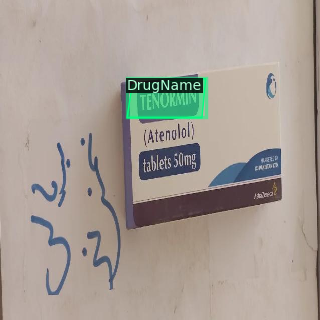

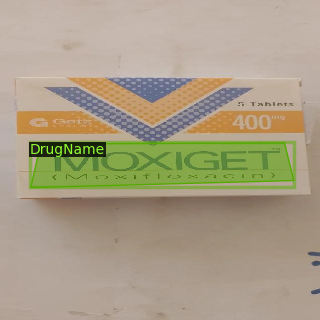

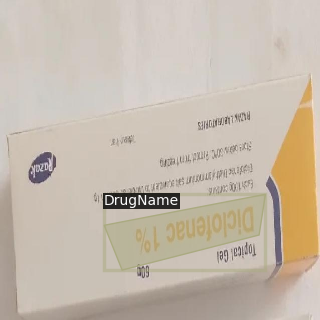

In [6]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=DN_Mask_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [7]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml'))
cfg.DATASETS.TRAIN = ("DN_Mask",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml')
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.MODEL.DEVICE='cuda'
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

In [ ]:
# cfg.OUTPUT_DIR = "/drive/MyDrive/Celebal_CLE_Task_3"

In [ ]:
import shutil
import os

# Define source and destination paths
source_file = '/content/output/model_final.pth'  # Replace with your source file path in Colab runtime
destination_folder = '/content/drive/MyDrive/Celebal'  # Replace with your destination folder path in Google Drive

# Check if the destination folder exists, create if not
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Move the file from Colab runtime to Google Drive folder
shutil.copy(source_file, destination_folder)


'/content/drive/MyDrive/Celebal/model_final.pth'

In [10]:
# cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml'))
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/Celebal", "model_final.pth")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
# cfg.DATASETS.TEST = ("DN_Mask", )
# predictor = DefaultPredictor(cfg)

# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.95
# cfg.DATASETS.TEST = ("DN_Mask", )
predictor = DefaultPredictor(cfg)

[12/30 07:14:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Celebal/model_final.pth ...


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir output

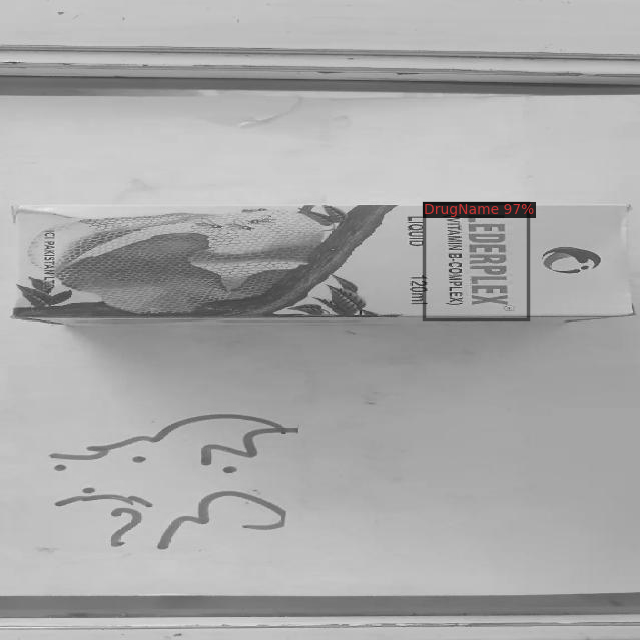

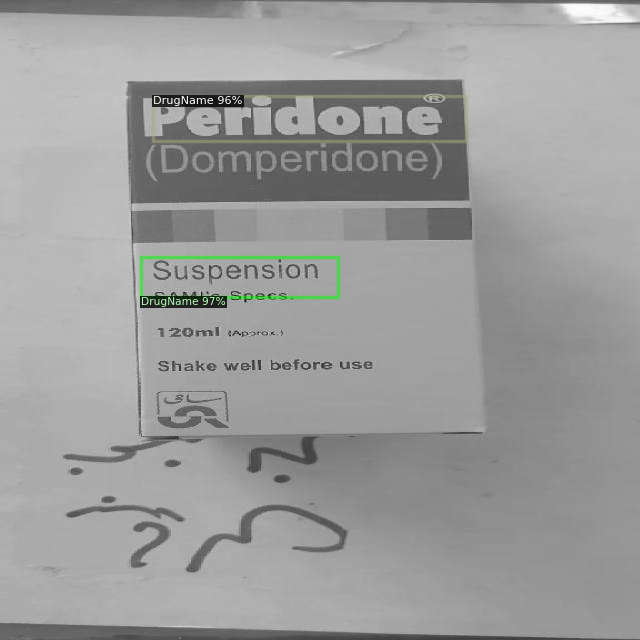

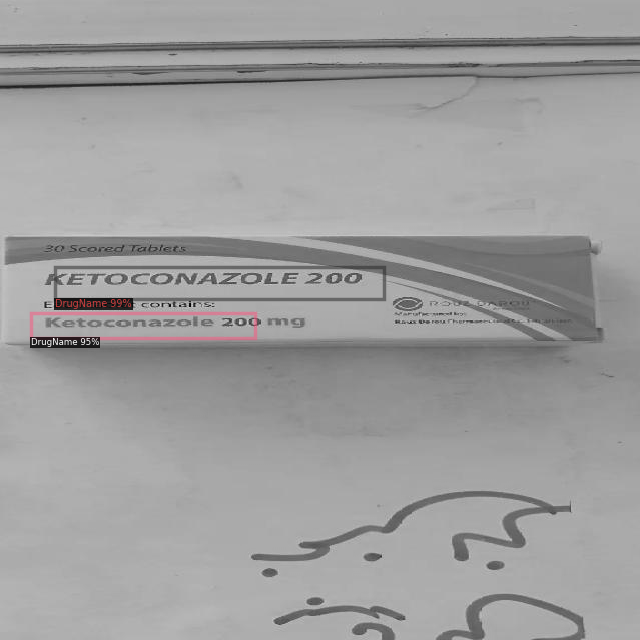

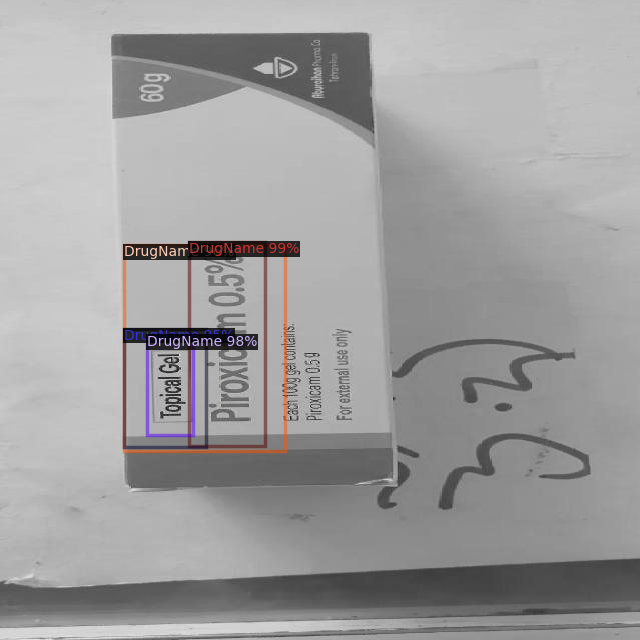

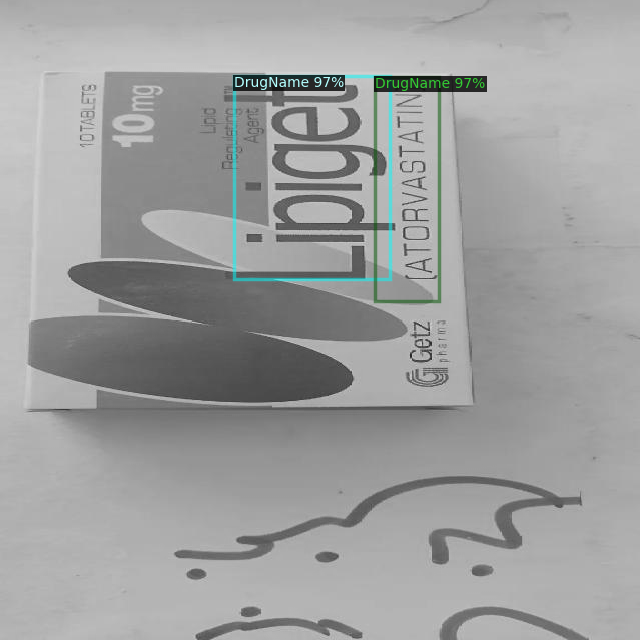

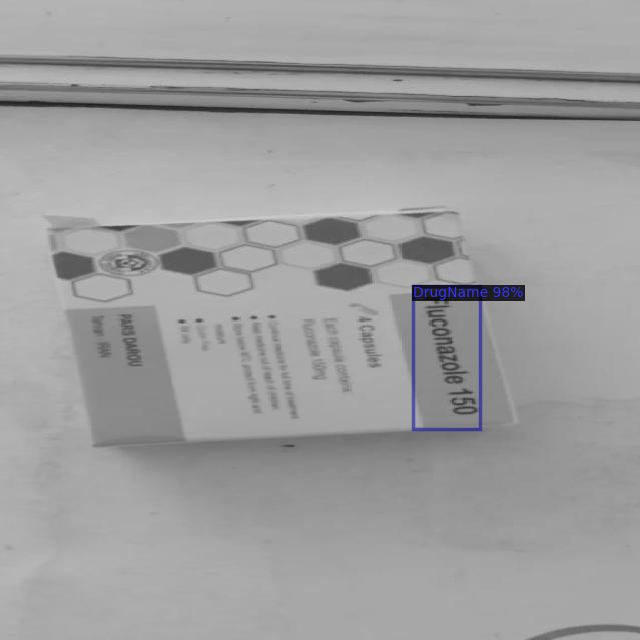

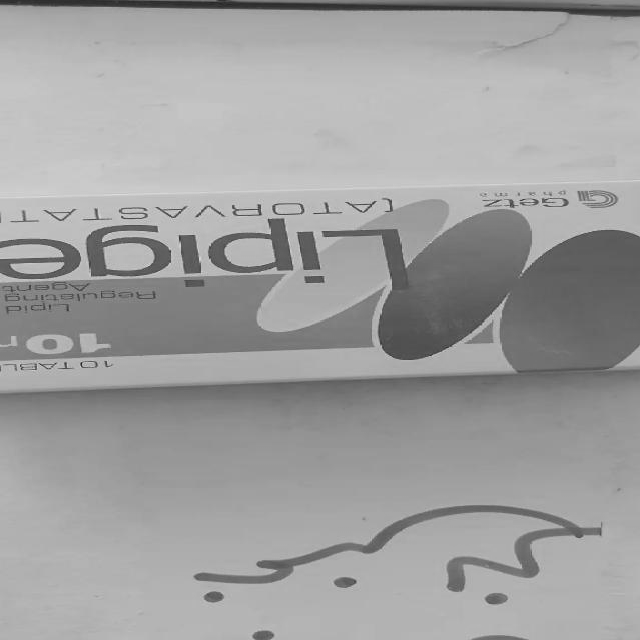

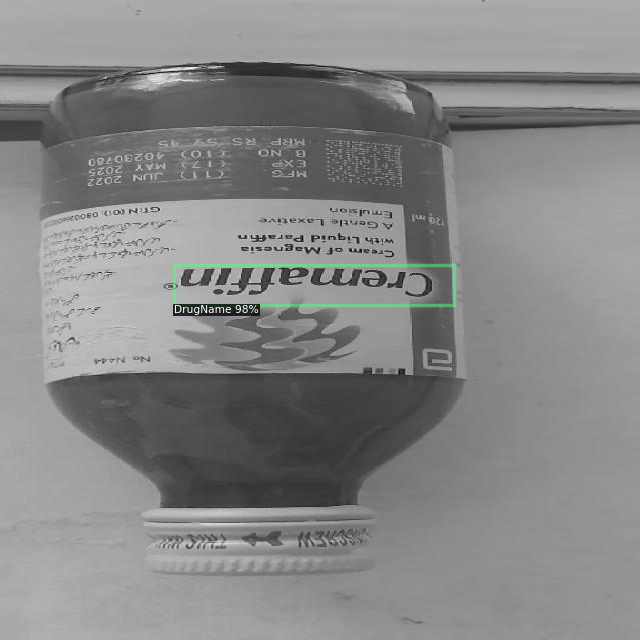

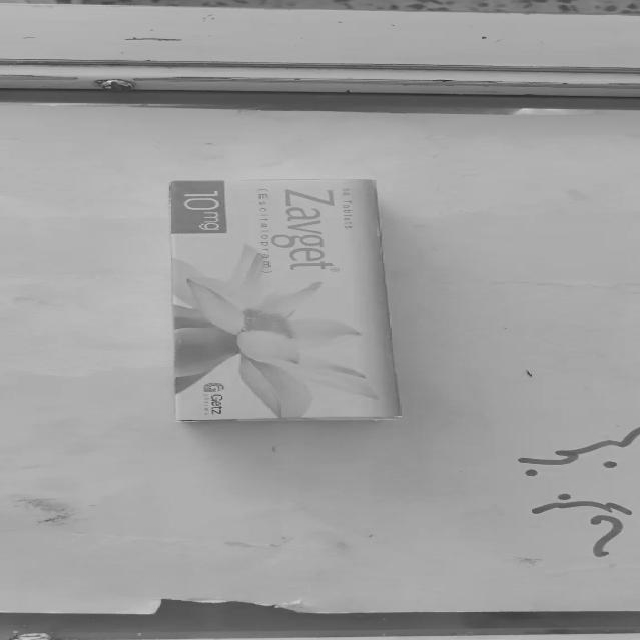

In [11]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 9):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=DN_Mask_metadata,
                   scale=1.,
                   instance_mode=ColorMode.IMAGE_BW
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [12]:
import locale
print(locale.getpreferredencoding())

import locale
def getpreferredencoding(do_setlocale = True):
 return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [13]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1
# !ngrok authtoken 2aBWoWvnsrH2WoCEz3Mlo2Pi93d_WcyQZpHZ4paEhqJPVM9q

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=c8b65375051dae85659a3946fa52bda1f93d6e020e128194a0af6a9c6d1993f4
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


In [14]:
!ngrok authtoken 2aEFu41p9L7RXRAFHJ6VnjSc4wk_3exzza4ge77WiU7sUiJU1

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask_ngrok import run_with_ngrok
from werkzeug.utils import secure_filename
import os
from flask import Flask, render_template, request, redirect, url_for
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
import cv2
template_folder = "/content/drive/MyDrive/Celebal/templates"

app = Flask(__name__, template_folder=template_folder)
run_with_ngrok(app)  # Start ngrok when app is run

# Set the upload folder and allowed extensions
UPLOAD_FOLDER = 'uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

os.makedirs("static", exist_ok=True)


@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return redirect(url_for('index'))

    file = request.files['file']

    if file.filename == '':
        return redirect(url_for('index'))

    # Save the uploaded file
    file_path = os.path.join('uploads', file.filename)
    file.save(file_path)

    # Perform prediction
    img = cv2.imread(file_path)
    outputs = predictor(img)
    # outputs = detector(img)

    # Visualize predictions
    v = Visualizer(img[:, :, ::-1], scale=1.2, instance_mode=ColorMode.IMAGE_BW)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    output_image_path = os.path.join('static', 'output_image.jpg')
    cv2.imwrite(output_image_path, out.get_image()[:, :, ::-1])

    return render_template('index.html', prediction_image=output_image_path)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://a738-35-240-147-161.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:15:57] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:15:58] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:16:08] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:16:08] "GET /static/output_image.jpg HTTP/1.1" 200 -
